## 영화 리뷰분석
- IMDB 데이터 활용

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets.imdb import load_data

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 준비

In [2]:
(X_train, y_train), (X_test, y_test) = load_data(num_words=500)

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [4]:
# print(X_train[n]) for문
# for idx in range(len(X_train)):
for idx in range(2): # 2개만
    print(f'[{idx}] - {y_train[idx]}]\n{X_train[idx]}')
    print('--'*30)

[0] - 1]
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
------------------------------------------------------------
[1] - 0]
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14

---
## [2] 학습용 데아터 변환
- keras에서 이미 대부분의 전처리가 끝난 데이터
- 길이 조정이 필요 => 패딩(Padding)

#### [2-1] 데이터별 길이 결정

In [5]:
len_idx=[]
for idx in X_train:
    len_idx.append(len(idx))

min(len_idx), max(len_idx), sum(len_idx)/25000

(11, 2494, 238.71364)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fd561efa60>,
 'caps': [<matplotlib.lines.Line2D at 0x1fd5878f100>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fd561ef8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fd5878f5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fd5878f8b0>],
 'means': []}

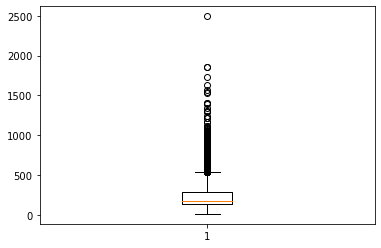

In [6]:
plt.boxplot(len_idx)

In [7]:
all_length=np.array([ len(x) for x in X_train])
all_length.mean(), all_length.std(), all_length.min(), all_length.max()

(238.71364, 176.49367364852034, 11, 2494)

(array([1.7598e+04, 5.3690e+03, 1.4070e+03, 5.1700e+02, 9.4000e+01,
        7.0000e+00, 5.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  11. ,  259.3,  507.6,  755.9, 1004.2, 1252.5, 1500.8, 1749.1,
        1997.4, 2245.7, 2494. ]),
 <BarContainer object of 10 artists>)

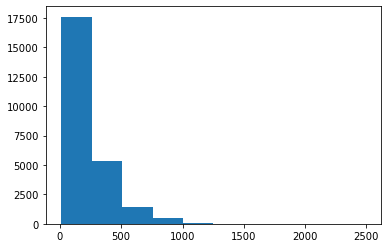

In [8]:
plt.hist(all_length)

#### [2-2] 데이터별 길이 변경

In [9]:
train_seq = pad_sequences(X_train, padding='pre',
                       maxlen=100, truncating='post')

test_seq = pad_sequences(X_test, padding='pre',
                       maxlen=100, truncating='post')
train_seq.shape, train_seq

((25000, 100),
 array([[  1,  14,  22, ...,   2,   2,  16],
        [  1, 194,   2, ...,   2,   7,   2],
        [  1,  14,  47, ..., 326,  23,   2],
        ...,
        [  1,  11,   6, ...,   2,  11,   4],
        [  1,   2,   2, ...,   4,   2,   2],
        [  1,  17,   6, ...,   5,   2, 272]]))

In [10]:
train_ca=to_categorical(train_seq)
test_Ca=to_categorical(test_seq)

#### [2=3] 훈련/테스트 데이터 준비

In [11]:
X_train, X_val, y_Train, y_val=train_test_split(train_ca,
                               y_train, test_size=0.2,
                               random_state=42)

In [12]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((20000, 100, 500), (5000, 100, 500), (25000,), (5000,))

---
## [3] 모델 생성
- 목표 : 영화리뷰 데이터 학습 후 사용자가 입력하는 리뷰가 긍정/부정 분류
- 학습모델 : RNN 순환신경망
- 입력 : 500
- 출력 : 1 => 분류 => 2진분류
https://keras.io/api/layers/recurrent_layers/simple_rnn/
https://keras.io/api/layers/recurrent_layers/

#### [3-1] 모델 구성
- 입력층 : n개 - 타임스템프 수, 
- 출력층 : 노드 1개 - sigmoid => Dense

In [13]:
model=Sequential()

# 1개 노드 = w500 + b + w9 * 9 =
model.add(SimpleRNN(10, input_shape=(100, 500)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                5110      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


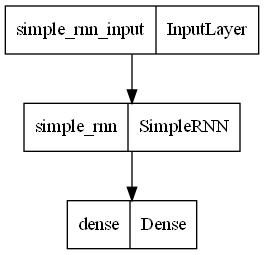

In [14]:
plot_model(model)

#### [3-2] 모델 생성
- 손실함수, 최적화방법, 평가항목 => compile()

In [15]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics='accuracy')

#### [3-3] 모델학습

## [4] 학습
- train 데이터와 타겟으로 학습 진행
- epoch마다 검증 진행 -> validation_data, validation_split
- 학습 중 이벤트 처리 -> callbacks=[]
- 학습 진행 내용 조절 => verbose
- 학습 횟수 조절 => epochs
- 배치사이즈 조절 => batch_size (기:32)

In [16]:
model.fix(X_train, y_train)

AttributeError: 'Sequential' object has no attribute 'fix'

## [5] 평가